# Task 4 - Decision Trees Visualization

# 1.Importing libraries in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

# 2.Data Loading

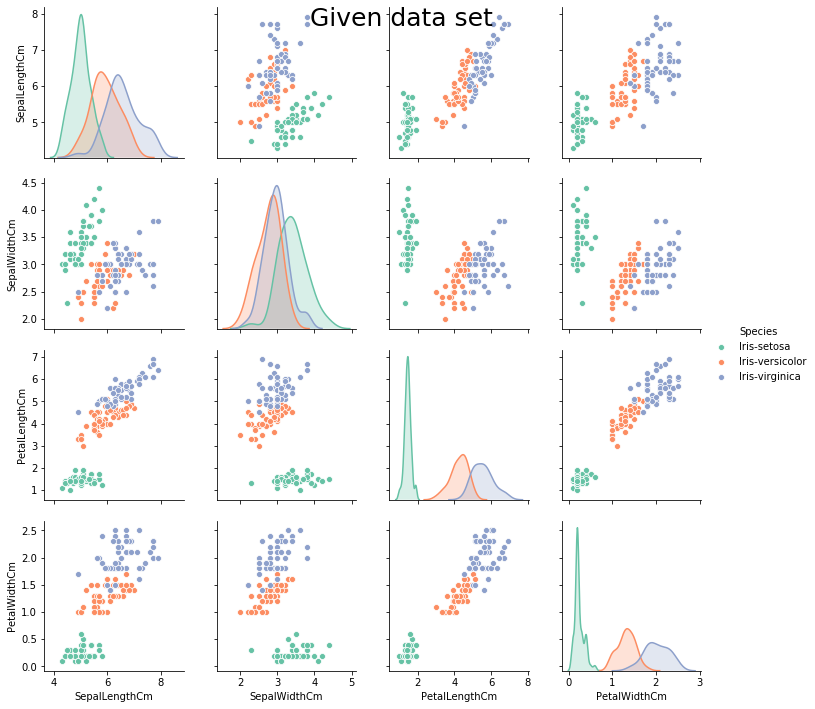

In [2]:
data=pd.read_csv('Iris.csv')
data.set_index(['Id'],inplace=True)
sns.pairplot(data=data,hue="Species",palette="Set2")
plt.suptitle('Given data set',size=25)
plt.show()

X=data.iloc[:,:-1]
y=data.iloc[:,-1].values

In [3]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# 3.Data Visualization

Let us first check how are the Sepal lengths and widths distributed

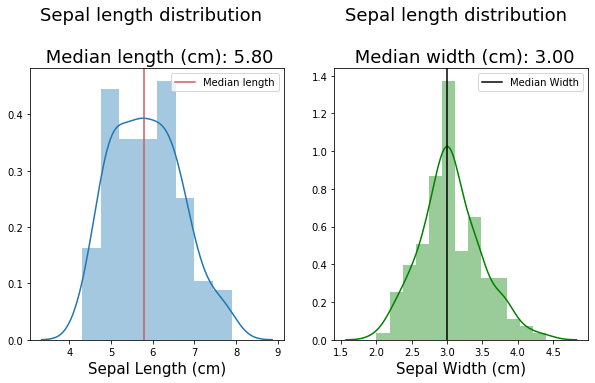

In [5]:
fig1=plt.figure(figsize=(10,5))
ax1=fig1.add_subplot(121)

g=sns.distplot(data['SepalLengthCm'],ax=ax1)
ax1.set_xlabel('Sepal Length (cm)',size=15)
ax1.set_title('Sepal length distribution  \n \n Median length (cm): {0:.2f}'.format(data['SepalLengthCm'].median()),size=18)
g.axvline(data['SepalLengthCm'].median(),color='indianred',label='Median length')
ax1.legend()


ax2=fig1.add_subplot(122)
h=sns.distplot(data['SepalWidthCm'],ax=ax2,color='green')
ax2.set_xlabel('Sepal Width (cm)',size=15)
ax2.set_title('Sepal length distribution  \n \n Median width (cm): {0:.2f}'.format(data['SepalWidthCm'].median()),size=18)
h.axvline(data['SepalWidthCm'].median(),color='black',label='Median Width')
ax2.legend()

The median sepal length is 5.8 cm while median sepal width is 3 cm.

Let us now visualise the distribution of petal lengths and widths.

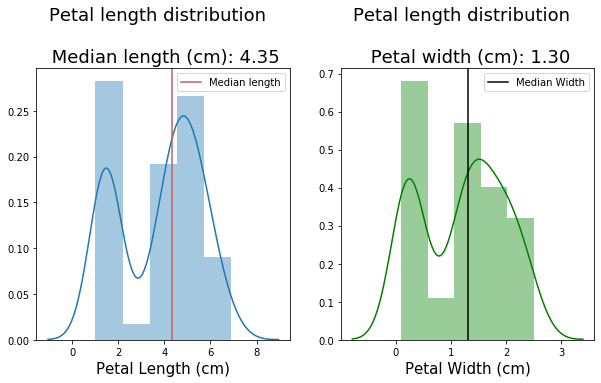

In [6]:
fig2=plt.figure(figsize=(10,5))
ax3=fig2.add_subplot(121)

g=sns.distplot(data['PetalLengthCm'],ax=ax3)
ax3.set_xlabel('Petal Length (cm)',size=15)
ax3.set_title('Petal length distribution  \n \n Median length (cm): {0:.2f}'.format(data['PetalLengthCm'].median()),size=18)
g.axvline(data['PetalLengthCm'].median(),color='indianred',label='Median length')
ax3.legend()


ax4=fig2.add_subplot(122)
h=sns.distplot(data['PetalWidthCm'],ax=ax4,color='green')
ax4.set_xlabel('Petal Width (cm)',size=15)
ax4.set_title('Petal length distribution  \n \n Petal width (cm): {0:.2f}'.format(data['PetalWidthCm'].median()),size=18)
h.axvline(data['PetalWidthCm'].median(),color='black',label='Median Width')
ax4.legend()

The petal lengths and width are highly dispersed. Infact, it seems like the distribution is bimodal in nature i.e. with two peaks.

# Area plot of various dimensions

Let us check the relative difference in values of sepal dimensions and petal dimensions using an area plot. The greater the area, the higher the dimension values.

Text(0, 0.5, 'Dimensions (cm)')

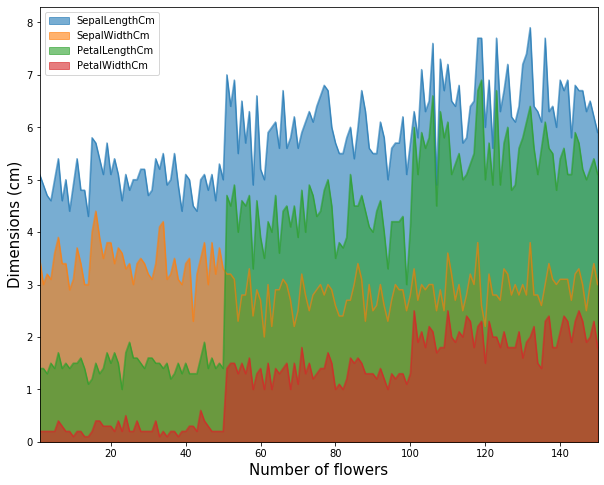

In [7]:
data.plot.area(y=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                  alpha=0.6,figsize=(10,8),stacked=False)
plt.xlabel('Number of flowers',size=15)
plt.ylabel('Dimensions (cm)',size=15)

From the above area plot, we can see that Sepal length values are in general higher than any other values
The darker shades in the graph shows the regions where the density of values are the highest.

# Step 4: Machine Learning

Let us now apply machine learning concept to be able to predict the species of flower when we are given with any dimensions of sepal and petal.

In [8]:
X_train, X_test,y_train,y_test=train_test_split(X,y)
model=DecisionTreeClassifier(max_features=3,max_depth=3).fit(X_train,y_train)

In [9]:
y_predict=model.predict(X_test)
print('Classification report for Decision Tree Classifier\n',classification_report(y_test,y_predict))

Classification report for Decision Tree Classifier
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



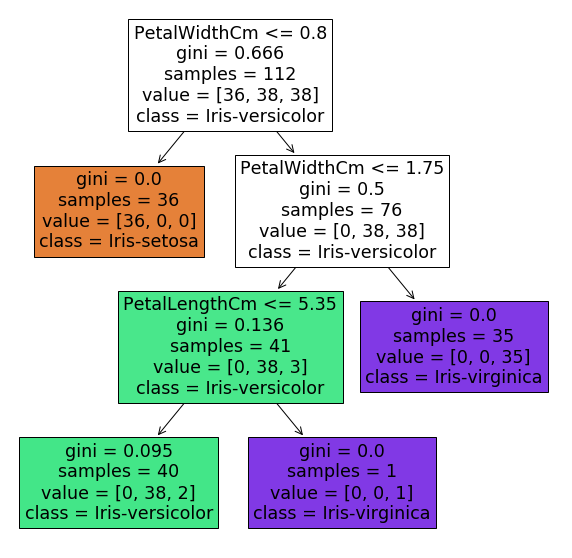

In [10]:
plt.figure(figsize=(10,10))
dec=plot_tree(model,filled = True,feature_names = data.columns,class_names=data["Species"].unique().tolist())